## Non-Cartesian MRI With BART

This demo (source)[https://mrirecon.github.io/bart/examples.html], showcases BART's ability to simuate non-cartesian sampling trajectories, generate representative phantoms, and reconstruct images using the non-uniform FFT (nuFFT)

In [1]:
import bartpy.tools as bart
from matplotlib import pyplot as plt

%matplotlib inline

In [16]:
# Generate a trajectory

traj_rad = bart.traj(r=True, x=512, y=64)

In [17]:
# Scale the trajectory

traj_rad2 = bart.scale(traj_rad, 0.5)

In [18]:
# Use the t (trajectory) option to simulate a phantom with a non-cartesian sampling trajectory

ksp_sim = bart.phantom(k=True, s=8, t=traj_rad2)

In [5]:
trad_rad2 = bart.scale(traj_rad, 0.6)

In [19]:
# inverse gridding

igrid = bart.nufft(traj_rad2, ksp_sim, i=True, t=True)

In [7]:
reco1 = bart.rss(igrid, 8)

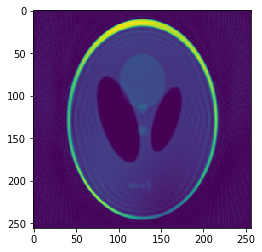

In [15]:
plt.imshow(abs(reco1))

In [8]:
lowres_img = bart.nufft(traj_rad2, ksp_sim, i=True, d=[24,24,1], t=True)
lowres_ksp = bart.fft(lowres_img, 7, u=True)

In [9]:
ksp_zerop = bart.resize(lowres_ksp, [0, 1], [308, 308], c=True)

In [10]:
sens = bart.ecalib(ksp_zerop, m=1)

In [11]:
reco2 = bart.pics(ksp_sim, sens, S=True, r=0.001, t=traj_rad2)

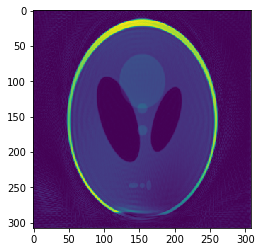

In [14]:
plt.imshow(abs(reco2))